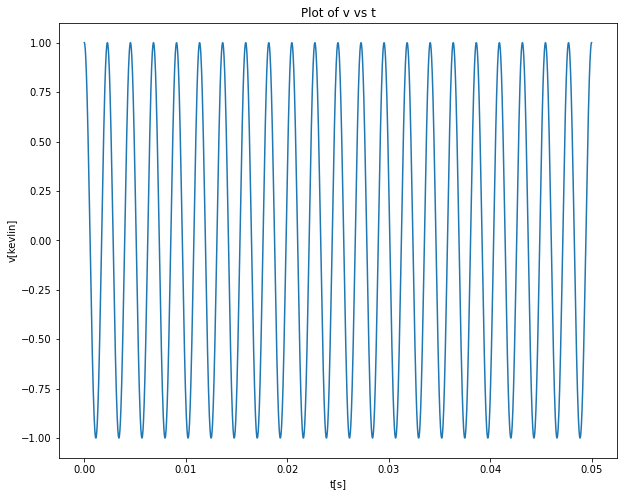

In [34]:
import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
sample_rate = 101.1*f_audio #samples per second
sample_time = 0.05 # seconds
omega = 2*np.pi*f_audio
x = 0.5

# time values

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = np.cos(omega*t_values)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t[s]')
plt.ylabel('v[kevlin]')
plt.title('Plot of v vs t')
#plt.ylim(0, 1.5)
plt.show()

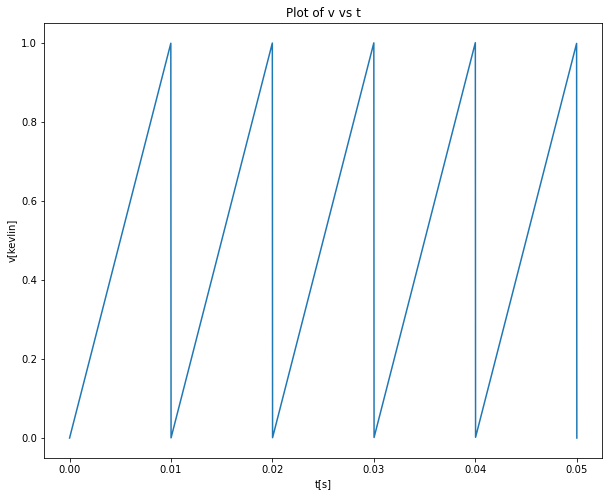

In [71]:
import matplotlib.pyplot as plt
import numpy as np

f_audio = 440 # Hz
sample_rate = 100*f_audio #samples per second
sample_time = 0.05 # seconds
t_ramp = 0.01 # seconds

omega = 2*np.pi*f_audio

x = 0.5
n_ramp = int(t_ramp*sample_rate) # number of sample points per ramp

# time values

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = ((t_values*sample_rate)%n_ramp)/(sample_rate*t_ramp)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t[s]')
plt.ylabel('v[kevlin]')
plt.title('Plot of v vs t')
#plt.ylim(0, 1.5)
plt.show()

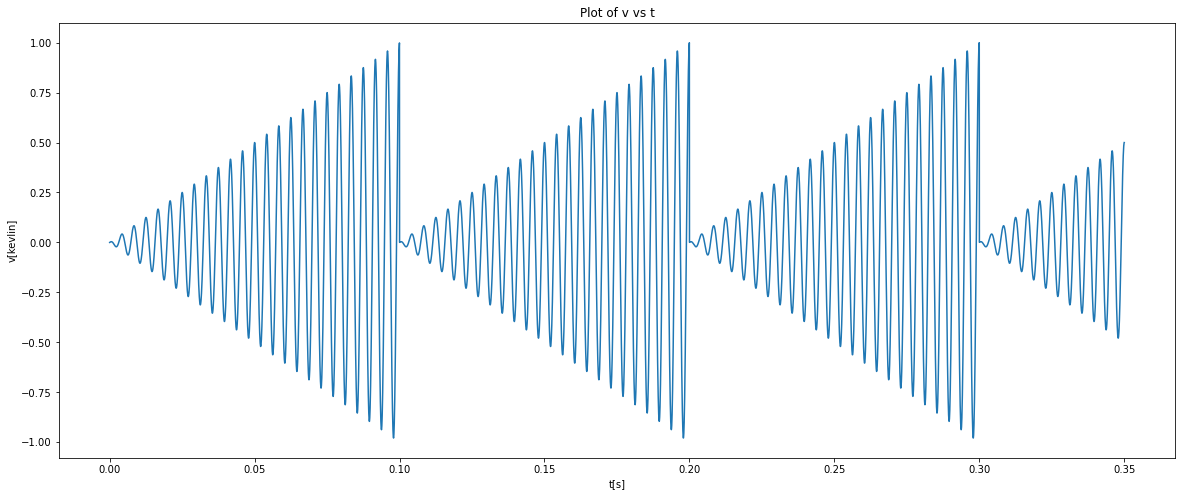

In [70]:
import matplotlib.pyplot as plt
import numpy as np

f_audio = 240 # Hz
sample_rate = 100*f_audio #samples per second
sample_time = 0.35 # seconds
t_ramp = 0.1 # seconds

omega = 2*np.pi*f_audio

x = 0.5
n_ramp = int(t_ramp*sample_rate) # number of sample points per ramp

# time values

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = np.cos(omega*t_values)*((t_values*sample_rate)%n_ramp)/(sample_rate*t_ramp)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
plt.xlabel('t[s]')
plt.ylabel('v[kevlin]')
plt.title('Plot of v vs t')
#plt.ylim(0, 1.5)
plt.show()

In [72]:
import numpy as np
from IPython.display import Audio

# Set the sample rate and duration
sr = 44100  # 44.1 kHz sample rate
duration = 5  # 5 seconds

# Create the time array
t = np.linspace(0, duration, sr * duration, endpoint=False)

# Create the 60 Hz sine wave
omega = 2 * np.pi * 440
sine_waveform = np.sin(omega * t)

# Play the sine wave
audio = Audio(data=sine_waveform, rate=sr)
display(audio)

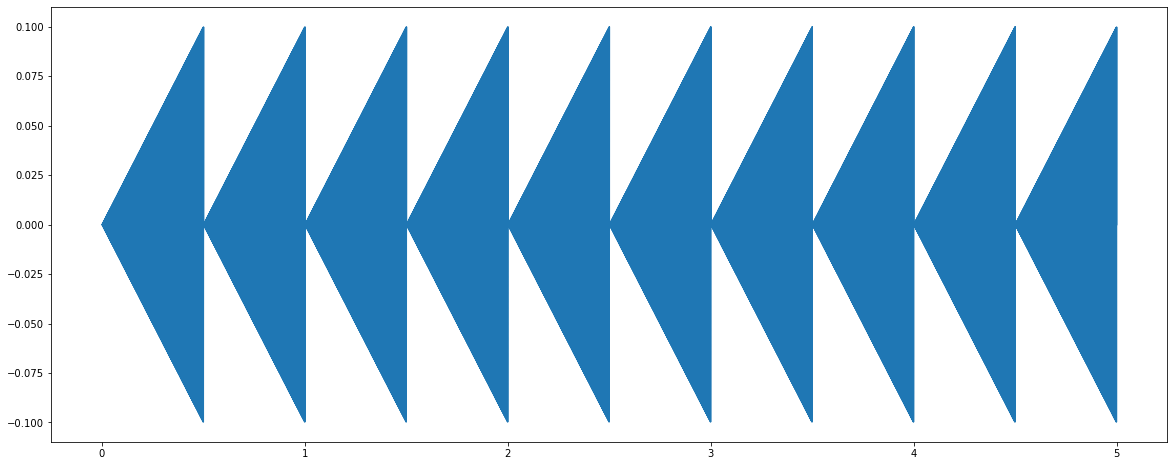

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


f_audio = 440 # Hz
sample_rate = 100*f_audio #samples per second
sample_time = 5 # seconds
t_ramp = 0.5 # seconds

omega = 2*np.pi*f_audio

x = 0.1
n_ramp = int(t_ramp*sample_rate) # number of sample points per ramp

# time values

t_values = np.linspace(0, sample_time,int(sample_rate*sample_time))
v_values = x*np.cos(omega*t_values)*((t_values*sample_rate)%n_ramp)/(sample_rate*t_ramp)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

#v_values = t_values + t_values
                       
plt.plot(t_values, v_values)
    
audio = Audio(data=v_values, rate=sample_rate)
display(audio)